In [187]:
import os
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import pandas as pd

In [90]:
plt.style.use("seaborn-whitegrid")
rcParams = matplotlib.rcParams

## Functions

In [41]:
def get_metrics(model_name, dataset_name):
    metric_files = []
    directories = os.listdir("results/"+dataset_name+"/"+model_name)
    for exp_id in directories:
        if exp_id != ".DS_Store":
            filepath = "results/"+dataset_name+"/"+model_name + "/" +exp_id +"/metrics.pckl"
            with open(filepath, "rb") as file:
                metric_file = pickle.load(file)
                metric_files.append(metric_file)
        
    final_metrics = dict()
    for key in metric_files[0].keys():
        final_metrics[key] = [metric[key] for metric in metric_files]
    return final_metrics
    

In [86]:
def get_metrics_avg(model_name, dataset_name):
    metrics = get_metrics(model_name, dataset_name)
    for key in metrics.keys():
        metrics[key] = np.mean(metrics[key])
    return metrics

In [108]:
def get_all_metrics_avg(model_name, datasets):
    final_metrics = dict()
    keys = get_metrics_avg(model_name, datasets[0]).keys()
    for key in keys:
        final_metrics[key] = [get_metrics_avg(model_name, dataset)[key] for dataset in datasets]
    return final_metrics    

In [109]:
def small_datasets():
    all_datasets = os.listdir("results/")
    return list(filter(lambda x: x!= ".DS_Store" and x[0:2]!= "cd_", all_datasets))

In [134]:
def cd_datasets():
    all_datasets = os.listdir("results/")
    return list(filter(lambda x: x!= ".DS_Store" and x[0:2]== "cd_", all_datasets))

## Small-data scatterplots

In [250]:
def small_scatterplot():
    large_text = 16
    small_text = 14
    fig_width = 9
    fig_height = 6
    params = {
      'axes.labelsize': large_text,
      'font.size': small_text,
      'legend.fontsize': small_text,
      'xtick.labelsize': small_text,
      'ytick.labelsize': small_text,
      'text.usetex': True,
      'figure.figsize': [fig_width, fig_height]
    }
    rcParams.update(params)


    markers = itertools.cycle(('o', '^', 's', 'x', '*', 'D', 'J'))
    for method in ["MondrianForest", "OnlineQRF", "CPApprox", "CPExact"]:
        method_metrics = get_all_metrics_avg(method, small_datasets())
        x,y = method_metrics["MER"], method_metrics["RIS"]
        plt.scatter(x,y, marker=next(markers), label = method)  # Can use util or ris on the y axis

    plt.legend()
    plt.xlabel("MER")
    plt.ylabel("RIS")
    plt.ylim(ymax=1.05, ymin=-0.05)

    plt.axvline(x=0.1, linestyle='dashed', color='grey')
    plt.title("Small-scale Data RIS vs. MER")
    plt.savefig("Images/small-RIS-MER.pdf", bbox_inches = "tight")
    plt.show()

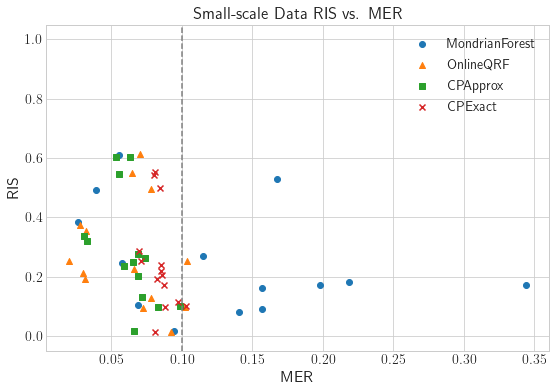

In [251]:
small_scatterplot()

## Small-data violin plot

In [243]:
def violin_plot(metric):
    # Note metrics is either Utility or QL
    large_text = 16
    small_text = 14
    params = {
        'axes.labelsize': large_text,
        'font.size': small_text,
        'legend.fontsize': small_text,
        'xtick.labelsize': small_text,
        'ytick.labelsize': small_text,
        'text.usetex': True,
        'figure.figsize': [9, 6]
    }
    rcParams.update(params)

    y_label = "Quantile Loss" if metric == "QL" else "Utility"
    
    
    dat = {method:get_all_metrics_avg(method, small_datasets())[metric] for method in ["MondrianForest","CPExact", "CPApprox", "OnlineQRF"]}
    pd_dat = pd.DataFrame(dat)
    sns.violinplot(data = pd_dat, cut=0, inner=None, bw=0.4, scale="width")
    
    ax = sns.violinplot( data=pd_dat, cut=0, inner=None, bw=0.4,
                        scale="width")
    ax = sns.swarmplot( data=pd_dat, edgecolor="grey", color="black")

    ax.set_ylabel(y_label)

    plt.title("Method " + y_label + " on Small-Scale Data" )
    plt.savefig("Images/" + y_label + "-violin.pdf", bbox_inches = "tight")

    plt.show()



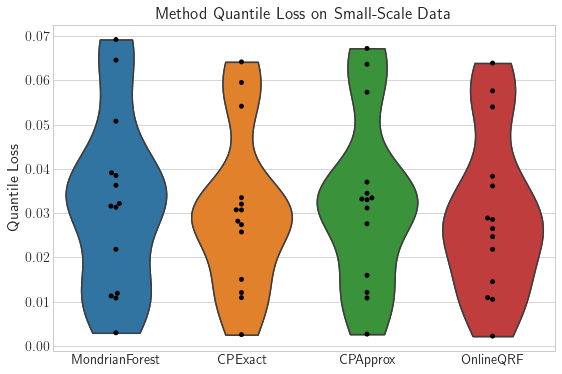

In [244]:
violin_plot("QL")

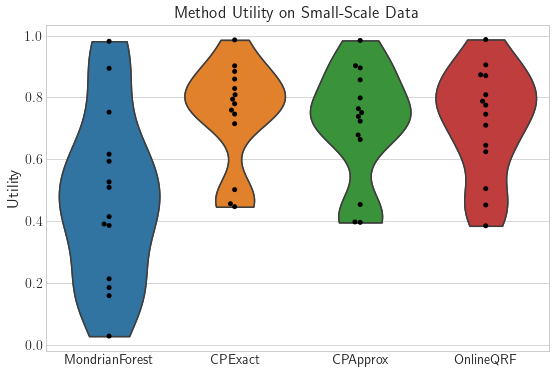

In [245]:
violin_plot("Utility")